# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("clean.csv")
# Drop unnecessary column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Basic overview
print("Data Shape:", df.shape)
print(df.info())
print("Missing Values:", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Data Shape: (12205, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14

# Target distribution

Revenue
False    0.843671
True     0.156329
Name: proportion, dtype: float64


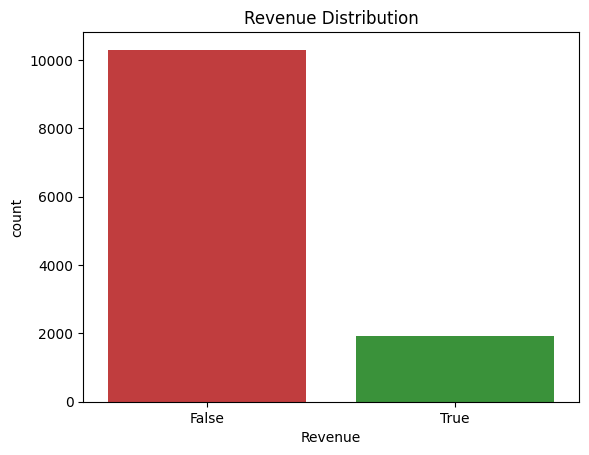

In [ ]:

print(df['Revenue'].value_counts(normalize=True))

# Updated color handling for Seaborn 0.14+
sns.countplot(
    data=df,
    x='Revenue',
    hue='Revenue',
    palette={True: "#2ca02c", False: "#d62728"},  # green for True, red for False
    legend=False
)

plt.title('Revenue Distribution')
plt.show()

## 💰 Revenue Distribution

- A **very large majority of users (~84%)** do **not generate revenue**, while only **~16%** do.
- This indicates that the dataset is **imbalanced**, with far fewer **positive (Revenue = True)** cases.

---

### ⚠️ Implications for Modeling:

- Class imbalance can lead to **biased models** that favor the majority class.
- Techniques such as:
  - **Resampling** (oversampling the minority or undersampling the majority)
  - Using **evaluation metrics beyond accuracy** (e.g., **precision**, **recall**, **F1-score**)  
  are necessary to build **robust and fair models**.


# Correlation Heatmap Analysis

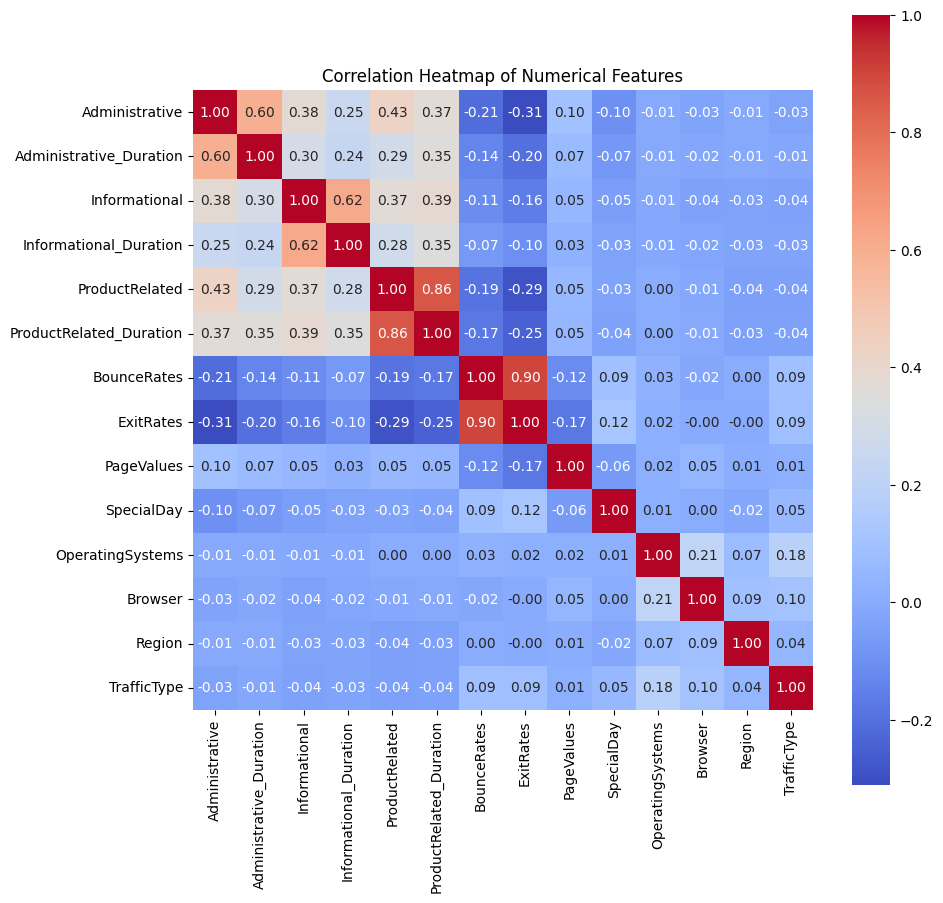

In [ ]:
# Correlation Heatmap
numeric_cols = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
                "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay",
                "OperatingSystems", "Browser", "Region", "TrafficType"]
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The correlation heatmap shows how different numerical features in the dataset relate to each other. A correlation value close to **1** means a strong positive relationship, close to **-1** means a strong negative relationship, and values near **0** indicate little or no linear relationship.

---

## 🔍 Key Observations:

### ✅ Strong Positive Correlations

- **ProductRelated & ProductRelated_Duration (0.86)**  
  Users who spend more time on product-related pages also tend to visit more of those pages. This is intuitive, as engaged shoppers usually explore product details in depth.

- **BounceRates & ExitRates (0.90)**  
  This strong correlation suggests that if a user leaves quickly after visiting only one page (high bounce), they are also highly likely to exit the site altogether. These two metrics are almost overlapping indicators of user disengagement.

- **Administrative & Administrative_Duration (0.60)**  
- **Informational & Informational_Duration (0.62)**  
  These moderate-to-strong correlations confirm that as users view more administrative or informational pages, they naturally spend more time on them.

---

### ⚖️ Moderate Correlations

- **ProductRelated with other durations (0.35–0.43)**  
  Product-related activity is somewhat connected with administrative and informational activity, but not as strongly. This indicates that product browsing is a distinct behavior, though it sometimes overlaps with other site navigation.

- **ExitRates & BounceRates with other features (0.20–0.30)**  
  These show that bounce/exit behaviors are weakly tied to other page types, meaning disengagement can occur regardless of what type of content the user interacts with.

---

### ⚠️ Weak or Negligible Correlations

- **Features like OperatingSystems, Browser, Region, TrafficType** show very low correlations (<0.10) with most other features.  
  This suggests that technical or demographic variables (e.g., browser choice, operating system) have minimal linear influence on user engagement metrics.

---

## 💡 Practical Implications

- The strong **multicollinearity between BounceRates and ExitRates** means including both in predictive models could be redundant; one might be dropped.
- Features like **ProductRelated & ProductRelated_Duration** capture similar behavior — one may serve as a proxy for the other.
- Weakly correlated features like **Region** or **Browser** may not add much predictive power individually, but could still be useful in non-linear models or interaction terms.

---

## 👉 In Short:

The heatmap reveals that **user engagement behaviors** (Bounce, Exit, Product activity) are tightly interlinked, while **technical/demographic attributes** play a much smaller role. This provides guidance on **feature selection** and helps avoid **redundancy** in modeling.


## 📈 Bounce Rate vs Exit Rate (Scatter + Trendline)

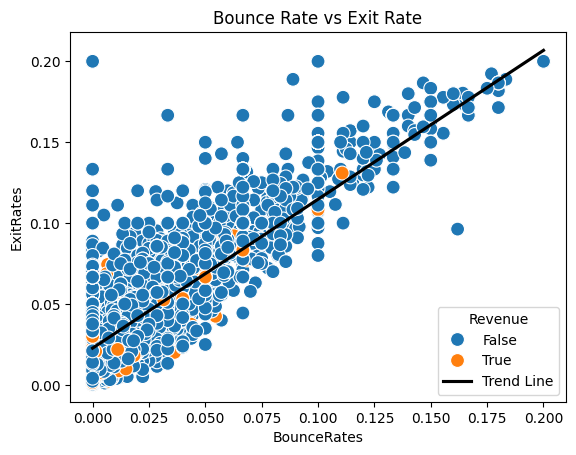

In [ ]:
sns.scatterplot(data=df, x='BounceRates', y='ExitRates',
                hue='Revenue', palette={True: "#ff7f0e", False: "#1f77b4"}, s=100)
sns.regplot(data=df, x='BounceRates', y='ExitRates',
            scatter=False, color='black', label='Trend Line')
plt.legend(title="Revenue")
plt.title('Bounce Rate vs Exit Rate')
plt.show()




- A **clear positive linear trend** is observed: as **Bounce Rate increases**, **Exit Rate** also increases.
- Most data points **cluster at lower values**, suggesting that **many sessions end quickly** after minimal interaction.
- **Revenue-generating sessions (Revenue = True)** are **sparse and scattered**, indicating that:
  - Such sessions are **rare**.
  - They are **not strongly concentrated** in any specific Bounce/Exit rate region.

---

### 🔍 Insight:

While Bounce and Exit Rates are closely linked, their relationship to revenue is **weak** — reinforcing the need to **look beyond these metrics** when identifying high-value sessions.


## 🧑‍🤝‍🧑 Visitor Type Distribution (Pie Chart)

In [ ]:
# Counts by Visitor Type and Revenue
visitor_revenue_count = df.groupby(['VisitorType', 'Revenue']).size().reset_index(name='count')
print(visitor_revenue_count)

         VisitorType  Revenue  count
0        New_Visitor    False   1271
1        New_Visitor     True    422
2              Other    False     65
3              Other     True     16
4  Returning_Visitor    False   8961
5  Returning_Visitor     True   1470


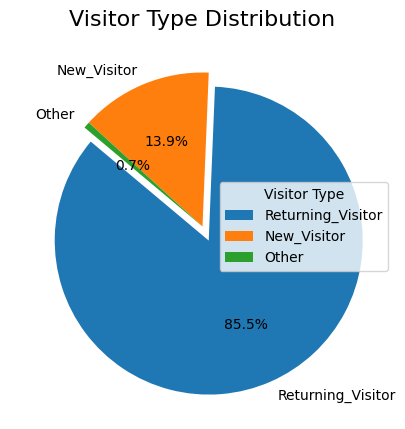

In [ ]:
visitor_counts = df['VisitorType'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(visitor_counts.values,
        labels=visitor_counts.index,
        colors=["#1f77b4", "#ff7f0e", "#2ca02c"],  # blue, orange, green
        explode=(0.1, 0, 0),  # highlight Returning Visitor
        autopct="%.1f%%",
        shadow=False,
        startangle=140)

plt.title("Visitor Type Distribution", fontsize=16)
plt.legend(title="Visitor Type")
plt.show()


The **majority of traffic (~85%)** comes from **Returning Visitors**, followed by **~14% New Visitors**, and **<1% Other**.

---

### 🔍 Key Insight:

- This suggests that most site traffic is from **loyal/repeat users**, which is a **positive sign for engagement**.

- However, **converting New Visitors into revenue-generating users** could be an important area of focus for growth and optimization.


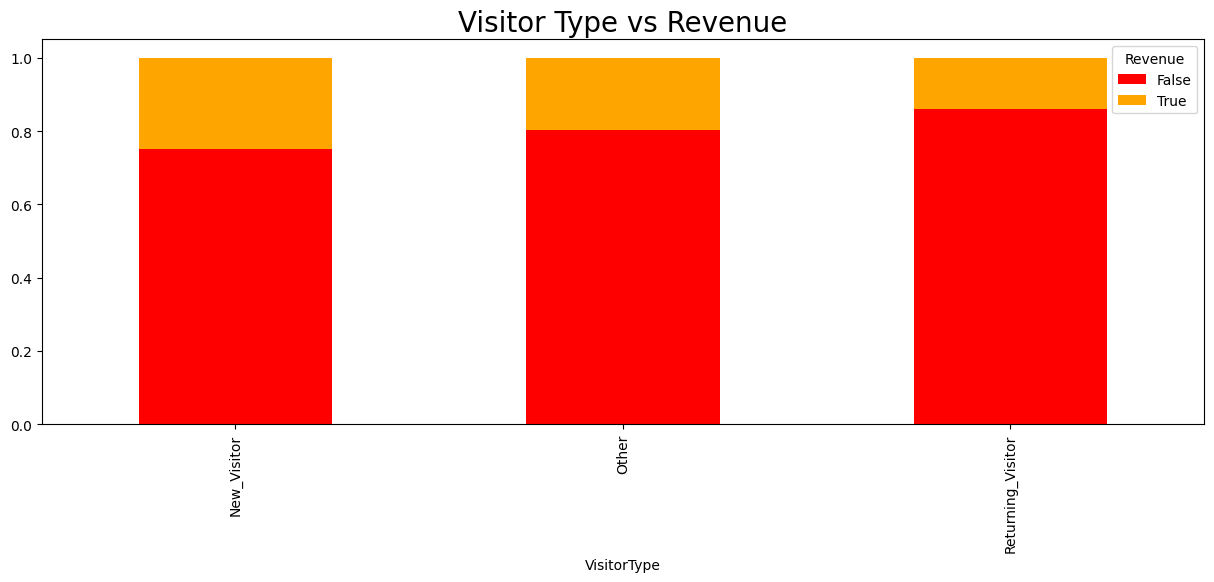

In [ ]:
# Visitor Type vs Revenue Stacked Bar
crosstab_vt = pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index')
crosstab_vt.plot(kind='bar', stacked=True, figsize=(15, 5), color=['red', 'orange'])
plt.title('Visitor Type vs Revenue', fontsize=20)
plt.show()

## 📊 Visitor Type vs Revenue (Stacked Bar Chart)

Across all visitor types, **non-revenue sessions dominate**.

- **Returning Visitors** show a **slightly higher share of revenue** compared to **New Visitors** and **Others**.
- This implies that **loyal customers are more likely to generate revenue**, but the **overall conversion rate remains very low**.

---

### 🔍 Key Takeaway:

Even among repeat visitors, **revenue-generating sessions are a small fraction**, highlighting an opportunity to **optimize conversion strategies** across all visitor segments.


## 🚦 Revenue by Traffic Type


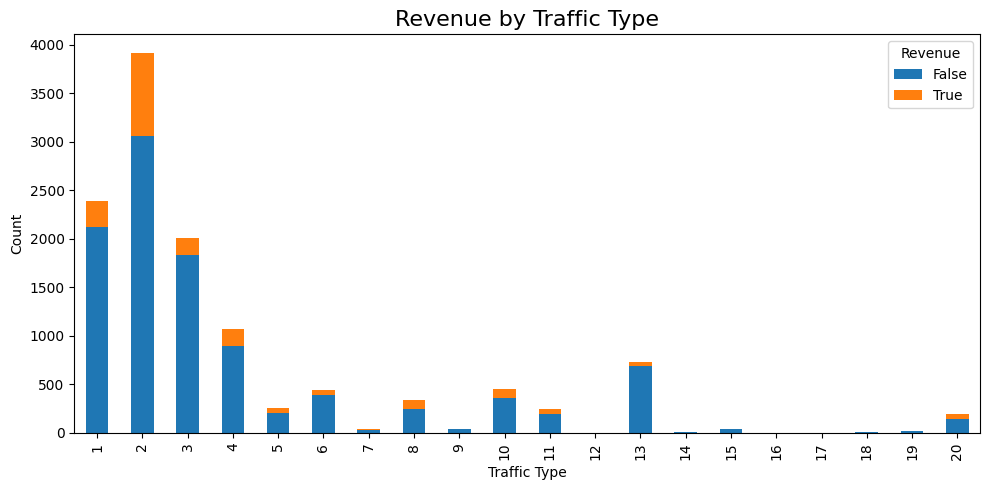

In [ ]:
counts = df.groupby(['TrafficType', 'Revenue']).size().reset_index(name='count')
pivoted = counts.pivot(index='TrafficType', columns='Revenue', values='count').fillna(0)

pivoted.plot(kind='bar', stacked=True, figsize=(10, 5),
             color={False: "#1f77b4", True: "#ff7f0e"})

plt.title('Revenue by Traffic Type', fontsize=16)
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()



- The chart shows that most users come from **Traffic Types 1, 2, and 3**, with **Traffic Type 2** being the **highest contributor** in terms of overall traffic.
- While the majority of sessions **do not generate revenue**, a **noticeable portion of conversions (Revenue = True)** also comes **mainly from Traffic Types 1–3**.

---

### 🎯 Strategic Insight:

- These traffic sources are the **most valuable** in terms of both **volume and revenue potential**.
- **Focusing marketing efforts** and optimization strategies on **Traffic Types 1–3** could yield **higher returns**, especially when compared to other channels where **revenue generation is minimal or absent**.


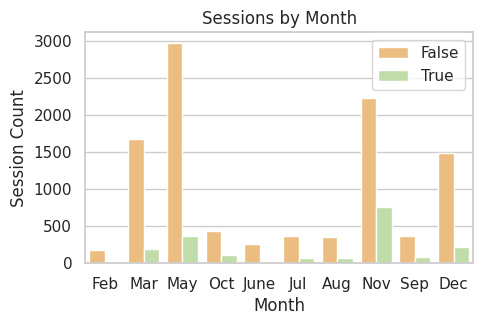

In [ ]:
sns.set(style="whitegrid")  # Set the plot style
plt.figure(figsize=(5, 3))  # Set the figure size
#visitor_revenue_count = visitor_revenue_count.toPandas()

# Create the scatter plot with color mapping
sns.countplot(data=df, x='Month', hue='Revenue', palette='Spectral')

# Add a legend
plt.legend()

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Session Count')
plt.title('Sessions by Month')

# Show the plot
plt.show()


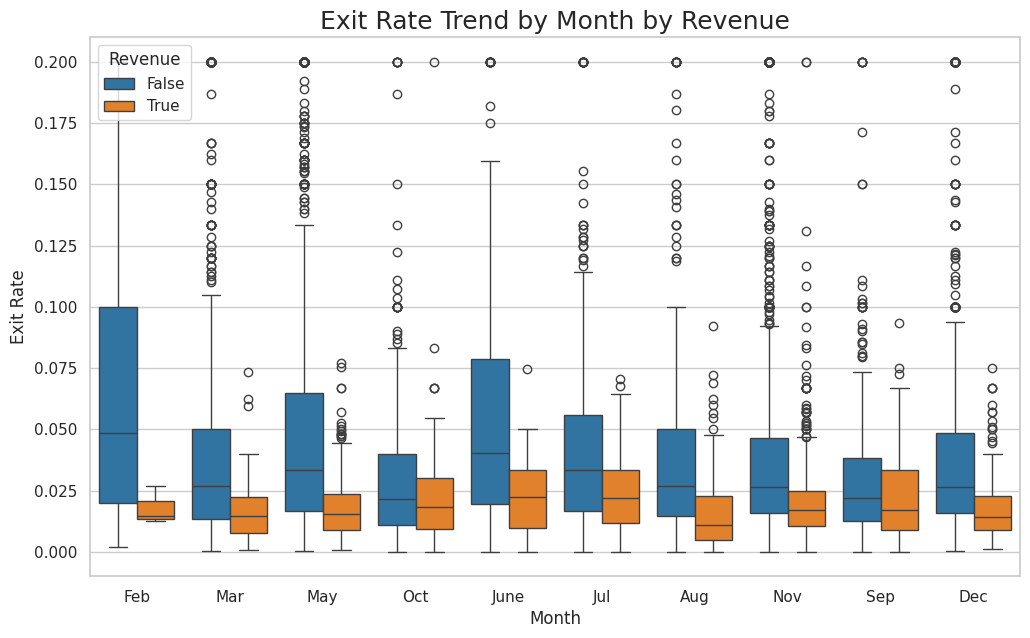

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Month', y='ExitRates', hue='Revenue',
            palette={False: "#1f77b4", True: "#ff7f0e"})

plt.title('Exit Rate Trend by Month by Revenue', fontsize=18)
plt.xlabel("Month")
plt.ylabel("Exit Rate")
plt.legend(title="Revenue")
plt.show()


The box plot shows that users with revenue (orange) consistently have lower exit rates compared to those without revenue (blue) across all months. This suggests that revenue-generating users are more engaged and less likely to exit. Additionally, exit rates among non-revenue users show higher variability and more outliers.


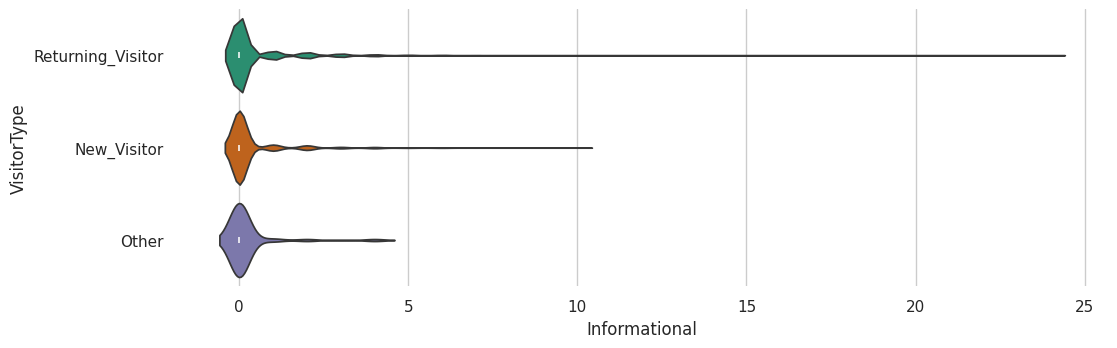

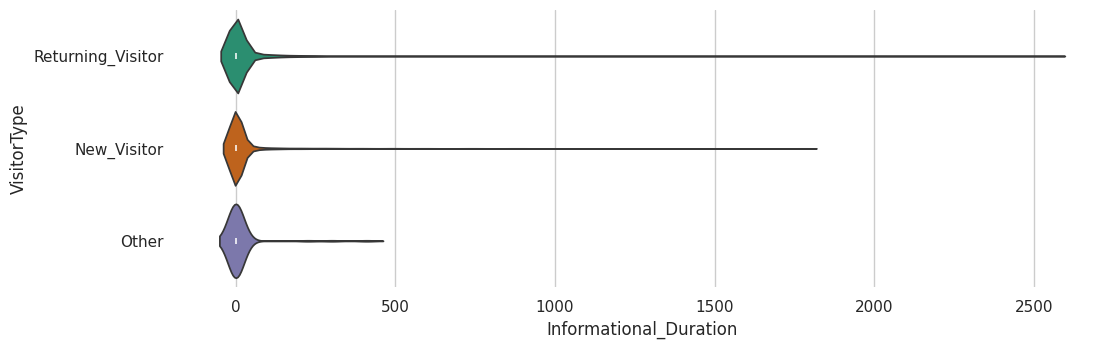

In [ ]:
# @title VisitorType vs Informational

from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(df['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=df,
    x='Informational',
    y='VisitorType',
    hue='VisitorType',
    inner='box',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)

# @title VisitorType vs Informational_Duration

figsize = (12, 1.2 * len(df['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=df,
    x='Informational_Duration',
    y='VisitorType',
    hue='VisitorType',
    inner='box',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)

plt.show()


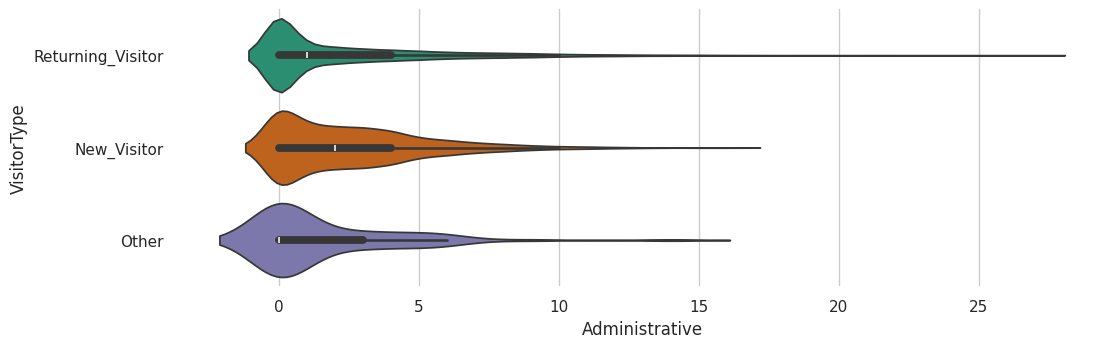

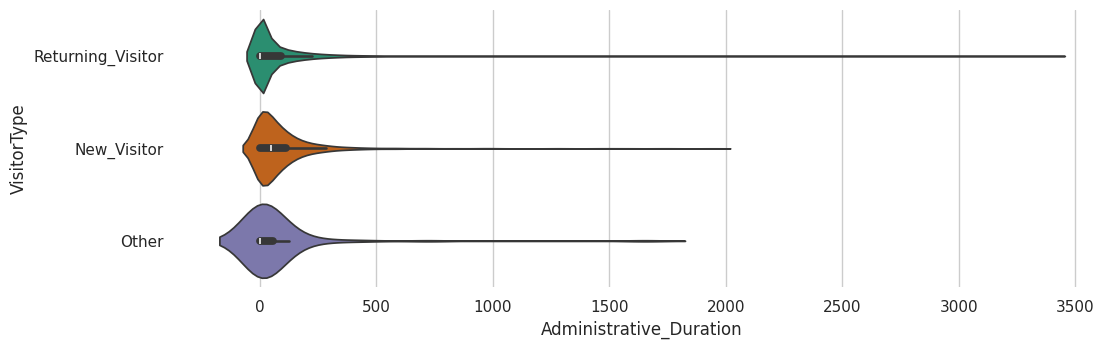

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(df['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=df,
    x='Administrative',
    y='VisitorType',
    hue='VisitorType',
    inner='box',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)

# VisitorType vs Administrative_Duration
figsize = (12, 1.2 * len(df['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(
    data=df,
    x='Administrative_Duration',
    y='VisitorType',
    hue='VisitorType',
    inner='box',
    palette='Dark2',
    legend=False
)
sns.despine(top=True, right=True, bottom=True, left=True)


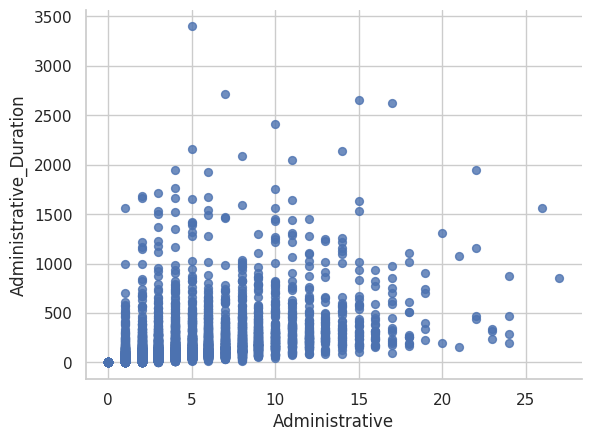

In [ ]:
# @title Administrative vs Administrative_Duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Administrative', y='Administrative_Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

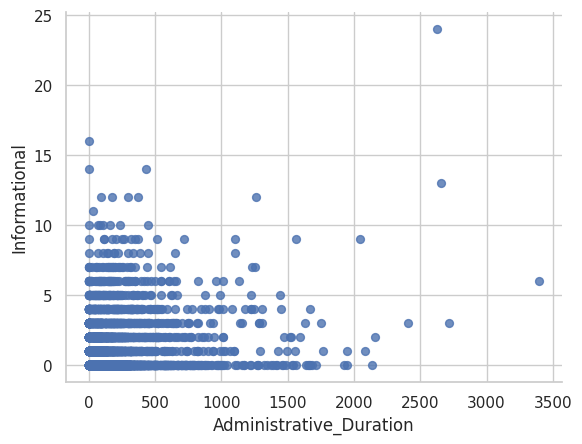

In [ ]:
# @title Administrative_Duration vs Informational

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Administrative_Duration', y='Informational', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

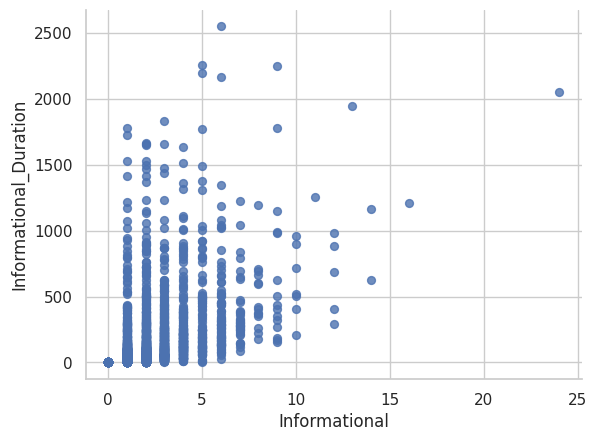

In [ ]:
# @title Informational vs Informational_Duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Informational', y='Informational_Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

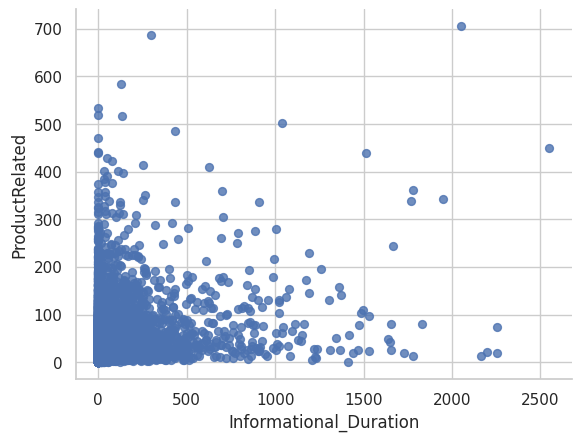

In [ ]:
# @title Informational_Duration vs ProductRelated

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Informational_Duration', y='ProductRelated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [ ]:
# 1. Handle categorical variables with advanced encoding
# For Month, use target encoding to capture seasonal patterns
month_revenue = df.groupby('Month')['Revenue'].mean().to_dict()
df['Month_Encoded'] = df['Month'].map(month_revenue)

# For VisitorType, use frequency encoding
visitor_freq = df['VisitorType'].value_counts(normalize=True).to_dict()
df['VisitorType_Freq'] = df['VisitorType'].map(visitor_freq)

In [ ]:
# 2. Create interaction features based on EDA insights
df['Total_PageViews'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Avg_Time_Per_Page'] = df['Total_Duration'] / (df['Total_PageViews'] + 1)  # Avoid division by zero

# Bounce/Exit interaction (highly correlated from EDA)
df['Bounce_Exit_Ratio'] = df['BounceRates'] / (df['ExitRates'] + 0.001)  # Avoid division by zero

In [ ]:
# 3. Create engagement metrics
df['Engagement_Score'] = (df['PageValues'] * 0.5 +
                         (1 - df['BounceRates']) * 0.3 +
                         (1 - df['ExitRates']) * 0.2)

In [ ]:
# 4. Handle skewed features with power transformation
skewed_features = ['Administrative_Duration', 'Informational_Duration',
                  'ProductRelated_Duration', 'PageValues']
pt = PowerTransformer(method='yeo-johnson')
df[skewed_features] = pt.fit_transform(df[skewed_features])

In [ ]:
# 5. Select features for modeling
numeric_features = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
    'Month_Encoded', 'VisitorType_Freq', 'Total_PageViews', 'Total_Duration',
    'Avg_Time_Per_Page', 'Bounce_Exit_Ratio', 'Engagement_Score'
]

In [ ]:
# Prepare feature matrix and target
X = df[numeric_features]
y = df['Revenue']

In [ ]:
# 6. Handle class imbalance with SMOTE
print("Before SMOTE:", y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Revenue
0    10297
1     1908
Name: count, dtype: int64
After SMOTE: Revenue
0    10297
1    10297
Name: count, dtype: int64


In [ ]:
# 7. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [ ]:
# 8. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 9. Feature selection using Mutual Information
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_series = pd.Series(mi_scores, index=numeric_features)
mi_series = mi_series.sort_values(ascending=False)


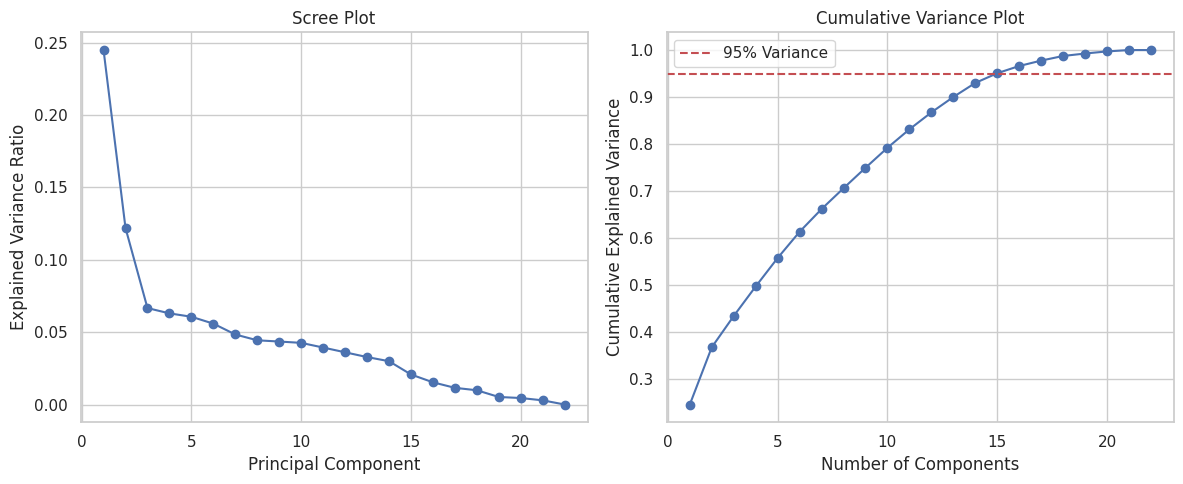

In [ ]:
# PCA for dimensionality reduction with visualization
# First, let's do a full PCA to see the explained variance
pca_full = PCA(n_components=len(numeric_features), random_state=42)
pca_full.fit(X_train_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Scree and cumulative variance plots
plt.figure(figsize=(12, 5))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Cumulative variance plot
plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Apply PCA with 95% variance threshold
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced from {len(numeric_features)} to {pca.n_components_} components with PCA")


Reduced from 22 to 15 components with PCA


In [ ]:
# 9. K-Means Clustering with Elbow Method and Silhouette Score
k_range = range(2, 10)
sse = []
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_train_pca, kmeans.labels_))


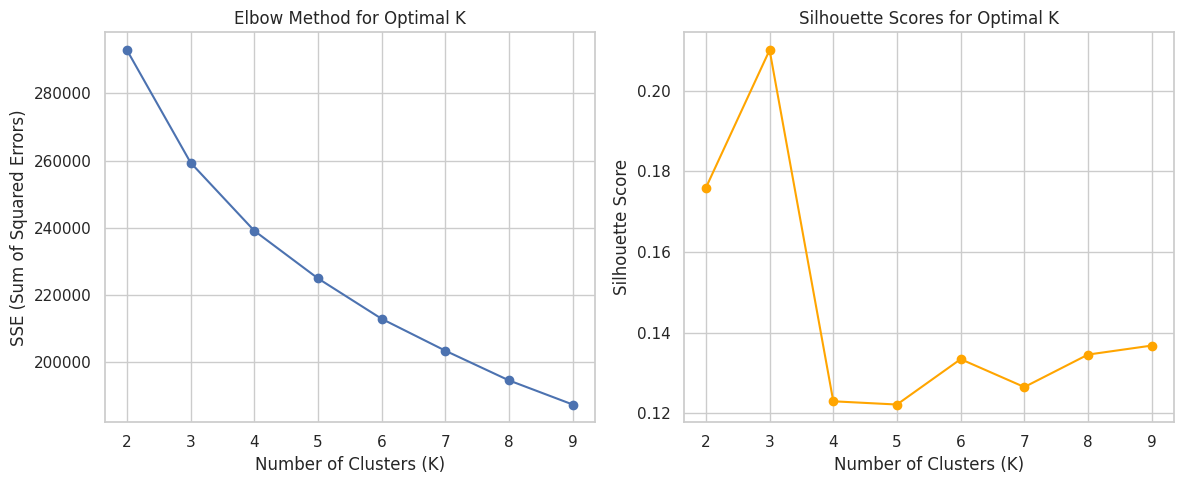

In [ ]:
# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Choose optimal k based on silhouette score
optimal_k = k_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette score: {max(sil_scores):.3f})")


Optimal number of clusters: 3 (Silhouette score: 0.210)


In [ ]:
# Apply clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(X_train_pca)

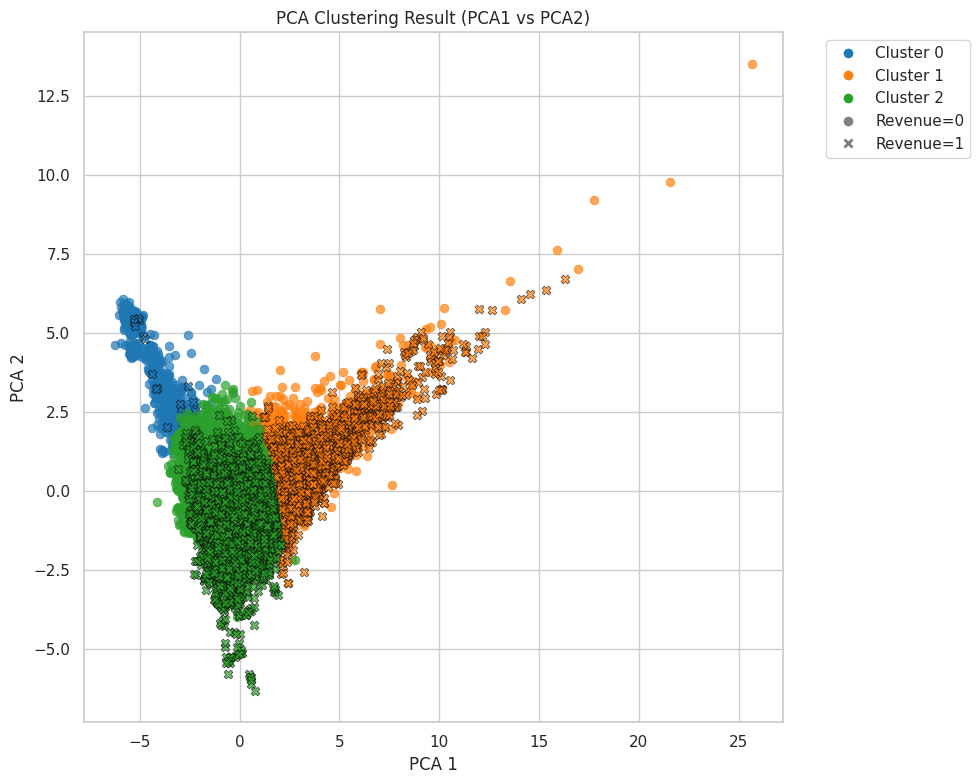

In [ ]:
# 10. PCA Clustering Visualization (PCA1 vs PCA2)
# Create a temporary DataFrame for visualization
pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = train_clusters
pca_df['Revenue'] = y_train.reset_index(drop=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("tab10", optimal_k)
markers = {0: 'o', 1: 'X'}  # 0 revenue -> circle, 1 revenue -> X

for cluster in range(optimal_k):
    for rev in [0, 1]:
        mask = (pca_df['Cluster'] == cluster) & (pca_df['Revenue'] == rev)
        plt.scatter(
            pca_df.loc[mask, 'PCA1'],
            pca_df.loc[mask, 'PCA2'],
            s=40,
            alpha=0.7,
            label=f'Cluster {cluster} Rev={rev}' if cluster < 2 else None,  # Limit legend entries
            marker=markers[rev],
            color=palette[cluster],
            edgecolors='black' if rev == 1 else None,
            linewidth=0.5
        )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Clustering Result (PCA1 vs PCA2)')
plt.grid(True)

# Create custom legend
legend_elements = []
for i in range(optimal_k):
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor=palette[i], markersize=8,
                                    label=f'Cluster {i}'))
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w',
                                markerfacecolor='gray', markersize=8, label='Revenue=0'))
legend_elements.append(plt.Line2D([0], [0], marker='X', color='w',
                                markerfacecolor='gray', markersize=8, label='Revenue=1'))

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# 11. Add cluster features to the dataset
test_clusters = kmeans.predict(X_test_pca)
X_train_final = np.hstack([X_train_pca, train_clusters.reshape(-1, 1)])
X_test_final = np.hstack([X_test_pca, test_clusters.reshape(-1, 1)])

print("Final feature matrix shape:", X_train_final.shape)

Final feature matrix shape: (16475, 16)



Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2060
           1       0.89      0.91      0.90      2059

    accuracy                           0.90      4119
   macro avg       0.90      0.90      0.90      4119
weighted avg       0.90      0.90      0.90      4119

ROC AUC Score: 0.9633


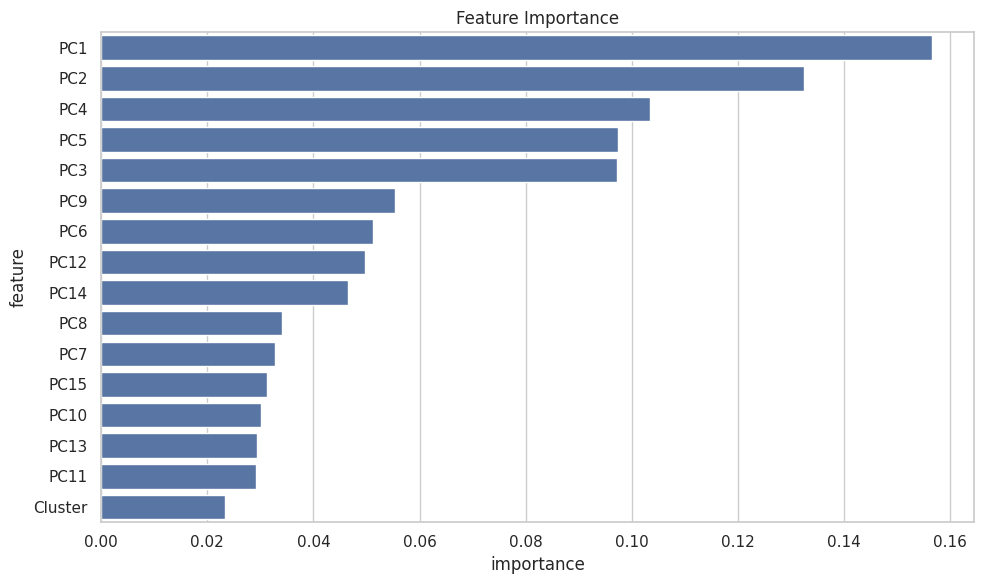

In [ ]:
# 12. Model Building (Optional - if you want to include it)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_final, y_train)

# Make predictions
y_pred = model.predict(X_test_final)
y_prob = model.predict_proba(X_test_final)[:, 1]

# Evaluate the model
print("\nModel Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Feature importance
if hasattr(model, 'feature_importances_'):
    feature_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])] + ["Cluster"]
    feat_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feat_imp)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

In [ ]:
# Create a complete DataFrame with all features and the target variable
# First, let's create DataFrames from the final feature matrices

# For training data
train_features_df = pd.DataFrame(X_train_final,
                                columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])] + ['Cluster'])
train_features_df['Revenue'] = y_train.reset_index(drop=True)
train_features_df['Set'] = 'Train'  # Mark as training data

# For test data
test_features_df = pd.DataFrame(X_test_final,
                               columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])] + ['Cluster'])
test_features_df['Revenue'] = y_test.reset_index(drop=True)
test_features_df['Set'] = 'Test'  # Mark as test data

# Combine both sets
preprocessed_df = pd.concat([train_features_df, test_features_df], ignore_index=True)

# Save to CSV
preprocessed_df.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved as 'preprocessed_data.csv'")

Preprocessed data saved as 'preprocessed_data.csv'
